<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/09-decision-trees/02_decision_tree_graphical_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The graphical boundary of decision trees

The boundary of a decision tree is also nice, and when the
data is two-dimensional, it is formed by a combination of vertical and horizontal lines.

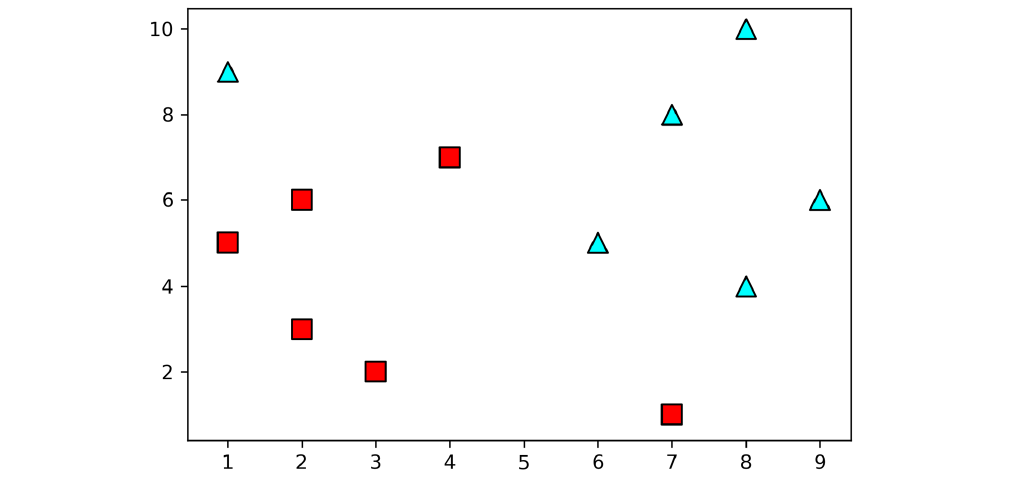

If you had to split this dataset using only one horizontal or vertical line, what line would you
pick? 

There could be different lines, according to the criteria you would use to measure the effectiveness
of a solution.

Let’s go ahead and select a vertical line at $x_0 = 5$. This leaves mostly triangles to the right of it and mostly squares to the left of it, with the exception of two misclassified
points, one square and one triangle.

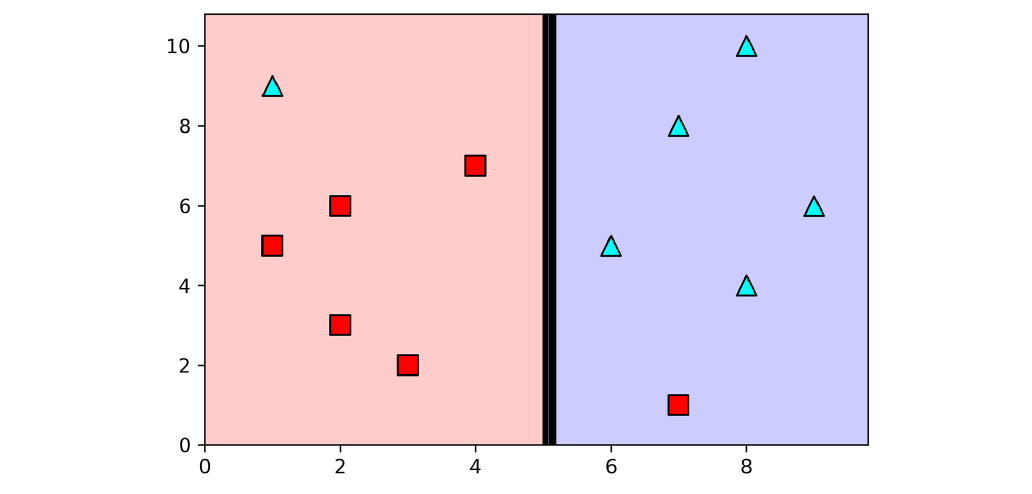

Now let’s look at each half separately. This time, it’s easy to see that two horizontal lines at
$x_1 = 8$ and $x_1 = 2.5$ will do the job on the left and the right side, respectively. These lines completely
divide the dataset into squares and triangles.

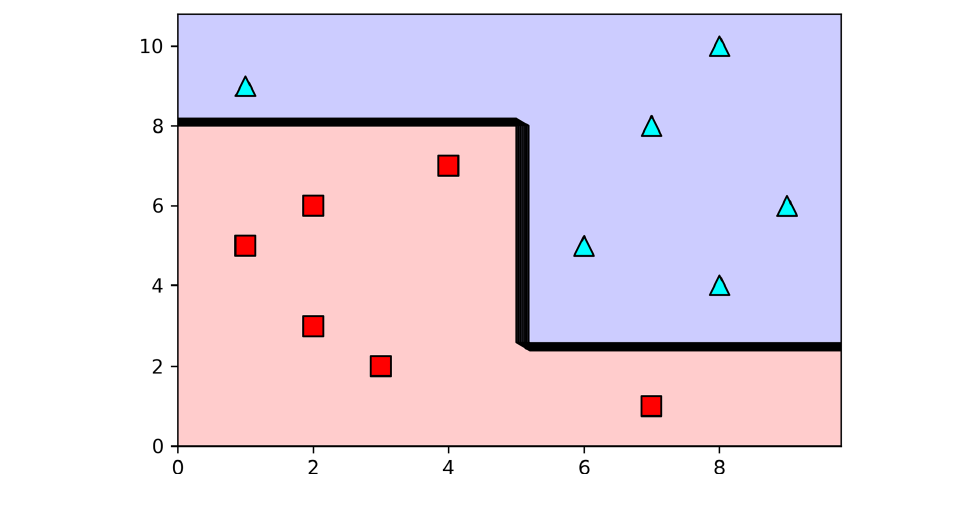

What we did here was build a decision tree. At every stage, we picked from each of the two features
($x_0$ and $x_1$) and selected the threshold that best splits our data.

##Setup

In [20]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter("ignore", UserWarning)

random.seed(0)

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_9_Decision_Trees/utils.py

Ref: https://www.kaggle.com/product-feedback/158412

In [ ]:
!pip install six

In [16]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [11]:
from six import StringIO
import utils

##Dataset

We begin by loading the dataset as a Pandas DataFrame called dataset.

In [4]:
dataset = pd.DataFrame({
  "x_0": [7,3,2,1,2,4,1,8,6,7,8,9],
  "x_1": [1,2,3,5,6,7,9,10,5,8,4,6],
  "y": [0,0,0,0,0,0,1,1,1,1,1,1]
})

dataset

,x_0,x_1,y
0,7,1,0
1,3,2,0
2,2,3,0
3,1,5,0
4,2,6,0
5,4,7,0
6,1,9,1
7,8,10,1
8,6,5,1
9,7,8,1


Now we separate the features and the labels.

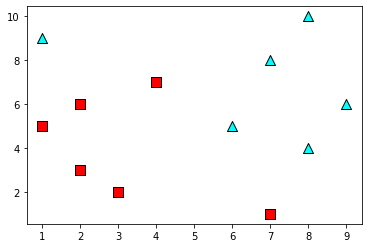

In [5]:
features = dataset[["x_0", "x_1"]]
labels = dataset["y"]

utils.plot_points(features, labels)

##Decision tree

To build the decision tree, we create a DecisionTreeClassifier object and use the fit function.

###Building tree using Gini index

DecisionTreeClassifier by default use gini index.

In [6]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(features, labels)
decision_tree.score(features, labels)

1.0

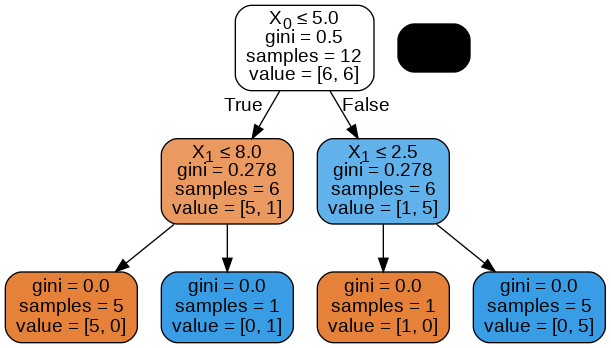

In [17]:
utils.display_tree(decision_tree)

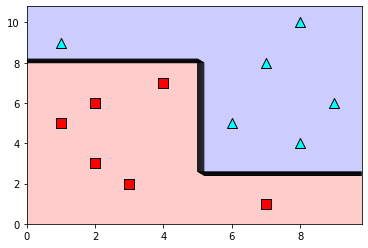

In [21]:
utils.plot_model(features, labels, decision_tree)

###Building tree using entropy

To train it using entropy, we can specify it when building the DecisionTree object.

In [22]:
decision_tree_entropy = DecisionTreeClassifier(criterion="entropy")

decision_tree_entropy.fit(features, labels)
decision_tree_entropy.score(features, labels)

1.0

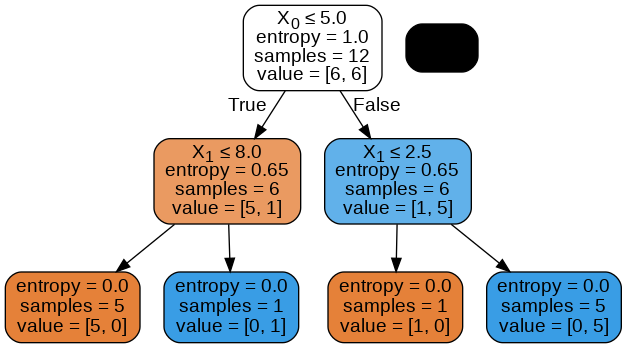

In [23]:
utils.display_tree(decision_tree_entropy)

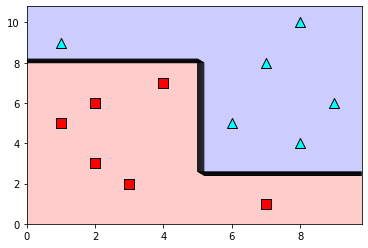

In [24]:
utils.plot_model(features, labels, decision_tree_entropy)

##Building decision tree depth-wise

We can specify more hyperparameters(`max_depth`) when training the tree.

In [25]:
decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1, criterion="entropy")

decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)

0.8333333333333334

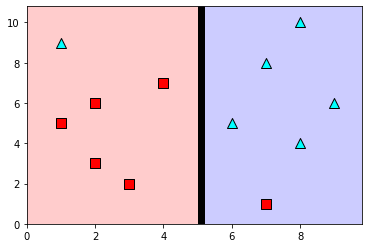

In [27]:
utils.plot_model(features, labels, decision_tree_depth_1)

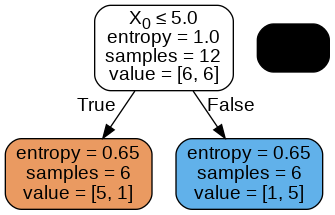

In [26]:
utils.display_tree(decision_tree_depth_1)

Let's build it with depth 2.

In [28]:
decision_tree_depth_2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")

decision_tree_depth_2.fit(features, labels)
decision_tree_depth_2.score(features, labels)

1.0

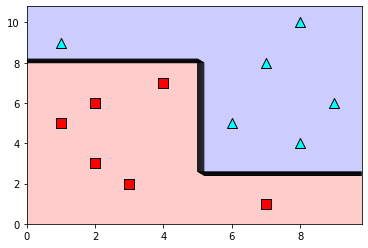

In [29]:
utils.plot_model(features, labels, decision_tree_depth_2)

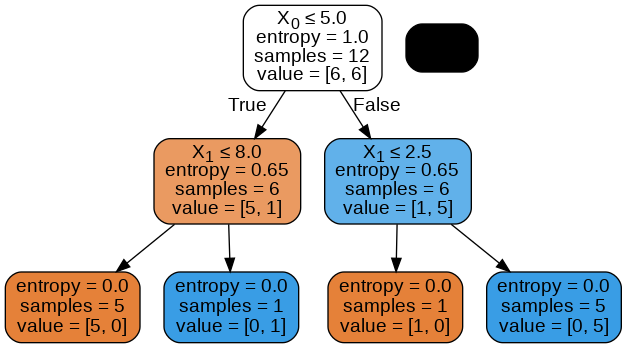

In [30]:
utils.display_tree(decision_tree_depth_2)

Let's build it with depth 3.

In [31]:
decision_tree_depth_3 = DecisionTreeClassifier(max_depth=3, criterion="entropy")

decision_tree_depth_3.fit(features, labels)
decision_tree_depth_3.score(features, labels)

1.0

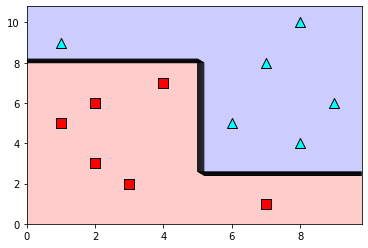

In [32]:
utils.plot_model(features, labels, decision_tree_depth_3)

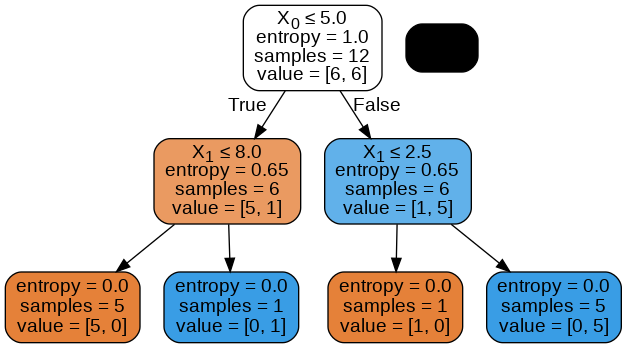

In [33]:
utils.display_tree(decision_tree_depth_3)

Since `entropy`'s value is 0.0 for every leaf level, so depth 3 is not created.